In [ ]:
df <- arrow::read_parquet(here("data", "featurefull.parquet") ) %>% relocate(starts_with("winner"), starts_with("looser"), starts_with("match"), starts_with("tournament"))

relocate: columns reordered (winner.name, winner.id, winner.rank, winner.bornAt, winner.height, …)



In [ ]:
vars <- c(
    "winner.lastTournamentDelayW",
    "looser.lastTournamentDelayW",
    "match.domHands",
    "match.tournamentRound",
    "match.hadTieBreaker", 
    "tournament.dateDistance",
    "match.diffRank",
    "winner.bornAt",
    "looser.bornAt",
    "winner.heightF",
    "looser.heightF",
    "winner.winrate",
    "looser.winrate",
    "winner.njogos",
    "looser.njogos",
    "winner.nTournament",
    "looser.nTournament",
    "match.backHands",
    "tournament.durationF",
    "tournament.quarterL2",
    "tournament.prize"
)
library(formulaic)
library(tictoc)

# huberty index { TODO
    # library(rlang)
    # hubInd_vec <- function(truth, estimate, na_rm = T, case_weights = NULL, ...){
    #     uniq <- unique(truth)
    #     moda <- uniqv[which.max(tabulate(match(v, uniq)))]
    #     Ho   <- accuracy_vec(truth, estimate, na_rm = na_rm, case_weights = case_weights)
    #     He   <- (plyr::count
    # }
    # hubInd <- new_class_metric(\(data, ...) UseMethod("hubInd"), direction = "maximize")
    # hubInd.data.frame <- \(data, truth, estimate, na_rm = T, case_weights = NULL, ...) class_metric_summarizer(
    #     name = "HubertyIndex",
    #     fn
    # )
# }
metrics <- metric_set(accuracy, f_meas, roc_auc, pr_auc)

form <- create.formula(input.names = vars, outcome.name = "match.setsCount", dat = df)
form$formula

match.setsCount ~ winner.lastTournamentDelayW + looser.lastTournamentDelayW + 
    match.domHands + match.tournamentRound + match.hadTieBreaker + 
    tournament.dateDistance + match.diffRank + winner.bornAt + 
    looser.bornAt + winner.heightF + looser.heightF + winner.winrate + 
    looser.winrate + winner.njogos + looser.njogos + winner.nTournament + 
    looser.nTournament + match.backHands + tournament.durationF + 
    tournament.quarterL2 + tournament.prize
<environment: 0x000001cb613e8520>

In [ ]:
df %>% select(all_of(vars)) %>% .[!complete.cases(.), ] %>% glimpse()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



Rows: 505
Columns: 21
$ winner.lastTournamentDelayW <dbl> 2, 2, 22, 16, 3, 3, 3, 3, 3, 5, 1, 1, 1, 7…
$ looser.lastTournamentDelayW <dbl> 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 2, 1, 1, 3, …
$ match.domHands              <fct> Right-Handed_Right-Handed, Right-Handed_Ri…
$ match.tournamentRound       <fct> Round of 64, Round of 64, Round of 32, Rou…
$ match.hadTieBreaker         <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, TR…
$ tournament.dateDistance     <drtn> -813456000 secs, -813456000 secs, -828576…
$ match.diffRank              <int> -29, -29, 102, 102, -19, -19, -19, -19, -4…
$ winner.bornAt               <fct> Other, Other, Australia, Australia, Other,…
$ looser.bornAt               <fct> Other, Other, NA, NA, Other, Other, Other,…
$ winner.heightF              <fct> 185, 185, 180, 180, 180, 180, 180, 180, 19…
$ looser.heightF              <fct> 170, 170, 173, 173, 173, 173, 173, 173, 17…
$ winner.winrate              <dbl> 51.13314, 51.13314, 47.24771, 47.24771, 60…
$ looser.winrate  

In [ ]:
df$winner.bornAt %<>% fct_na_value_to_level(level = "Other")
df$looser.bornAt %<>% fct_na_value_to_level(level = "Other")
df$tournament.prize <- if_else(df$tournament.prize %>% is.na, 0, df$tournament.prize)

In [ ]:
df %>% select(all_of(vars)) %>% .[!complete.cases(.),] %>% nrow()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



[1] 0

In [ ]:
df$tournament.dateDistance <- df$tournament.dateDistance/dyears(1)
df$tournament.dateDistance %>% glimpse()

 num [1:17926] -44.2 -44.2 -44.2 -44.2 -47.2 ...


In [ ]:
df %>% select(all_of(vars)) %>% glimpse()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



Rows: 17,926
Columns: 21
$ winner.lastTournamentDelayW <dbl> 1, 1, 1, 1, 20, 20, 18, 18, 1, 1, 1, 1, 1,…
$ looser.lastTournamentDelayW <dbl> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 11, 3, 11, 3…
$ match.domHands              <fct> Right-Handed_Left-Handed, Right-Handed_Lef…
$ match.tournamentRound       <fct> Quarter-Finals, Quarter-Finals, Quarter-Fi…
$ match.hadTieBreaker         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ tournament.dateDistance     <dbl> -44.23272, -44.23272, -44.23272, -44.23272…
$ match.diffRank              <int> -65, -65, -65, -65, -438, -438, -438, -438…
$ winner.bornAt               <fct> USA, USA, USA, USA, Other, Other, Other, O…
$ looser.bornAt               <fct> Other, Other, Other, Other, Other, Other, …
$ winner.heightF              <fct> 168, 168, 168, 168, 170, 170, 170, 170, 17…
$ looser.heightF              <fct> 163, 163, 163, 163, 163, 163, 163, 163, 16…
$ winner.winrate              <dbl> 58.73544, 58.73544, 58.73544, 58.73544, 54…
$ looser.winrat

In [ ]:
# folds
set.seed(1)
df.folds <- vfold_cv(df, v = 5, repeats = 5) # no strata
# workflow #this is needed for dummies, since not all do it automatically
recip <- recipe(form$formula, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(looser.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors()) %>% 
    step_mutate(match.hadTieBreaker = ifelse(match.hadTieBreaker, 1, 0) %>% as.double())
wf <- workflow() %>% add_recipe(recip %>% prep(df))
df.folds %>% glimpse()

Rows: 25
Columns: 3
$ splits <list> [<vfold_split[14340 x 3586 x 17926 x 69]>], [<vfold_split[1434…
$ id     <chr> "Repeat1", "Repeat1", "Repeat1", "Repeat1", "Repeat1", "Repeat2…
$ id2    <chr> "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "Fold1", "Fold2", …


In [ ]:
# logistic regression
lg <- logistic_reg() %>%
    set_engine("glm") %>%
    set_mode("classification")
tic()
    lg.fitted <- fit_resamples(wf %>% add_model(lg), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

→ A | warning: prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x3




23.06 sec elapsed


In [ ]:
collect_metrics(lg.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6777861
f_meas,0.7863830
pr_auc,0.7603074
roc_auc,0.6406441


In [ ]:
# svm linear
svm <- svm_linear() %>%
    set_engine("LiblineaR") %>%
    set_mode("classification")


tic()
    svm.fitted <- fit_resamples(wf %>% add_model(svm), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

51.97 sec elapsed


In [ ]:
collect_metrics(svm.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.5320682
bal_accuracy,0.4945938
f_meas,0.5896959


In [ ]:
# decision tree
dt <- decision_tree() %>%
    set_engine("rpart") %>% 
    set_mode("classification")

tic()
    dt.fitted <- fit_resamples(wf %>% add_model(dt), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

36.9 sec elapsed


In [ ]:
collect_metrics(dt.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6787456
bal_accuracy,0.5813750
f_meas,0.7843147


In [ ]:
# naive Bayes
library(discrim)
nb <- naive_Bayes() %>%
    set_engine("klaR") %>% 
    set_mode("classification")

tic()
    nb.fitted <- fit_resamples(wf %>% add_model(nb), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
detach("package:discrim")

665.58 sec elapsed


In [ ]:
collect_metrics(nb.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6604706
f_meas,0.7951793
pr_auc,0.7572316
roc_auc,0.6283939


In [ ]:
# random forest
rf <- rand_forest() %>%
    set_engine("ranger") %>% 
    set_mode("classification")
set.seed(1)
tic()
    rf.fitted <- fit_resamples(wf %>% add_model(rf), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

275.97 sec elapsed


In [ ]:
collect_metrics(rf.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9158763
bal_accuracy,0.8811829
f_meas,0.9394575


In [ ]:
# comparasion between full random forest and only important features
rel_vars <- c(
    "winner.bornAt",
    "winner.heightF",
    "winner.lastTournamentDelayW",
    "winner.winrate",
    "looser.njogos",
    "looser.winrate",
    "match.diffRank",
    "match.domHands",
    "match.hadTieBreaker",
    "tournament.dateDistance",
    "tournament.durationF",
    "tournament.prize",
    "tournament.quarterL2"
)

create.formula(input.names = rel_vars, outcome.name = "match.setsCount", dat = df)$formula -> imp_form
recip.rel <- recipe(imp_form, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors()) %>% 
    step_mutate(match.hadTieBreaker = ifelse(match.hadTieBreaker, 1, 0) %>% as.double())
wf.tune <- workflow() %>% add_recipe(recip.rel %>% prep(df))
wf.tune

Warning message:
"There are new levels in a factor: NA"


══ Workflow ══════════════════════════════════════════════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: None

── Preprocessor ──────────────────────────────────────────────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_relevel()
• step_relevel()
• step_dummy()
• step_mutate()

In [ ]:
tic()
    rf.imp.fitted <- fit_resamples(wf.tune %>% add_model(rf), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
collect_metrics(rf.imp.fitted) %>% select(metrica = .metric, valor = mean)

156.75 sec elapsed


select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9302242
bal_accuracy,0.9040308
f_meas,0.9490716


In [ ]:
# random forest tuning
rf.tuning <- rand_forest(
    mtry  = tune("n_predictors"),
    trees = tune("n_trees"),
    min_n = tune("min_node")
) %>%
    set_engine("ranger") %>% 
    set_mode("classification")

rf.tuning.wf <- wf.tune %>% add_model(rf.tuning)
rf.tuning.params <- rf.tuning.wf %>% extract_parameter_set_dials() %>% update(
    n_predictors = dials::mtry(c(1,6)),
    n_trees      = dials::trees(c(250, 750)),
    min_node     = dials::min_n(c(5, 20))
)
rf.tuning.params

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
mtry,n_predictors,model_spec,rand_forest,main,"integer, 1, 6, TRUE, TRUE, # Randomly Selected Predictors, function (object, x, log_vals = FALSE, ...) , {, if (!inherits(object, ""param"")) {, rlang::abort(""`object` should be a 'param' object.""), }, rngs <- range_get(object, original = FALSE), if (!is_unknown(rngs$upper)) {, return(object), }, x_dims <- dim(x), if (is.null(x_dims)) {, rlang::abort(""Cannot determine number of columns. Is `x` a 2D data object?""), }, if (log_vals) {, rngs[2] <- log10(x_dims[2]), }, else {, rngs[2] <- x_dims[2], }, if (object$type == ""integer"" & is.null(object$trans)) {, rngs <- as.integer(rngs), }, range_set(object, rngs), }"
trees,n_trees,model_spec,rand_forest,main,"integer, 250 , 750 , TRUE , TRUE , # Trees"
min_n,min_node,model_spec,rand_forest,main,"integer, 5, 20, TRUE, TRUE, Minimal Node Size, function (object, x, log_vals = FALSE, frac = 1/3, ...) , {, if (!inherits(object, ""param"")) {, rlang::abort(""`object` should be a 'param' object.""), }, rngs <- range_get(object, original = FALSE), if (!is_unknown(rngs$upper)) {, return(object), }, x_dims <- dim(x), if (is.null(x_dims)) {, rlang::abort(""Cannot determine number of columns. Is `x` a 2D data object?""), }, n_frac <- floor(x_dims[1] * frac), if (log_vals) {, rngs[2] <- log10(n_frac), }, else {, rngs[2] <- n_frac, }, if (object$type == ""integer"" & is.null(object$trans) & !log_vals) {, rngs <- as.integer(rngs), }, range_set(object, rngs), }"


In [ ]:
ctrl <- control_bayes(verbose = TRUE)
set.seed(1)
# expected 35 min +-
tic()
rf.tunning.search <- tune_bayes(
    rf.tuning.wf,
    resamples = df.folds, 
    initial = 5, 
    iter = 10,
    param_info = rf.tuning.params,
    control = ctrl,
    metrics = metric_set(f_meas, bal_accuracy, accuracy)
)
toc(log = T)



❯  Generating a set of 5 initial parameter results

✓ Initialization complete





── Iteration 1 ───────────────────────────────────────────────────────────────────────────────────────────────────────────



i Current best:		f_meas=0.9332 (@iter 0)

i Gaussian process model

✓ Gaussian process model

i Generating 4771 candidates

i Predicted candidates

i n_predictors=5, n_trees=746, min_node=5

i Estimating performance

i Fold1, Repeat1: preprocessor 1/1

✓ Fold1, Repeat1: preprocessor 1/1

i Fold1, Repeat1: preprocessor 1/1, model 1/1

✓ Fold1, Repeat1: preprocessor 1/1, model 1/1

i Fold1, Repeat1: preprocessor 1/1, model 1/1 (extracts)

i Fold1, Repeat1: preprocessor 1/1, model 1/1 (predictions)

i Fold2, Repeat1: preprocessor 1/1

✓ Fold2, Repeat1: preprocessor 1/1

i Fold2, Repeat1: preprocessor 1/1, model 1/1

✓ Fold2, Repeat1: preprocessor 1/1, model 1/1

i Fold2, Repeat1: preprocessor 1/1, model 1/1 (extracts)

i Fold2, Repeat1: preprocessor 1/1, model 1/1 (predictions)

i 

2467.53 sec elapsed


In [ ]:
tribble(
    ~Iteracao,~N_preditores, ~N_arvores, ~min_folha, ~f1,
    1,5,746,5,0.9533,
    2,6,694,5,0.9623,
    3,6,299,5,0.9612,
    4,6,722,5,0.9626,
    5,6,749,5,0.9623,
    6,6,508,5,0.9622,
    7,6,597,5,0.9621,
    8,6,426,5,0.9619,
    9,6,712,5,0.9623,
    10,5,257,5,0.953
)

Iteracao,N_preditores,N_arvores,min_folha,f1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,746,5,0.9533
2,6,694,5,0.9623
3,6,299,5,0.9612
4,6,722,5,0.9626
5,6,749,5,0.9623
6,6,508,5,0.9622
7,6,597,5,0.9621
8,6,426,5,0.9619
9,6,712,5,0.9623


In [ ]:
#rf without match.hadTieBreaker 
# random forest
set.seed(1)
form.noTieB <- create.formula(input.names = rel_vars[ !rel_vars == 'match.hadTieBreaker'], outcome.name = "match.setsCount", dat = df)
recip.noTieB <- recipe(form.noTieB$formula, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors())

wf.noTieB <- workflow() %>% add_recipe(recip.noTieB %>% prep(df))


rf.noTieB <- rand_forest(
    mtry = 6,
    trees = 694,
    min_n = 5
) %>%
    set_engine("ranger") %>% 
    set_mode("classification")
set.seed(1)
tic()
    rf.noTieB.fitted <- fit_resamples(wf.noTieB %>% add_model(rf.noTieB), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
collect_metrics(rf.noTieB.fitted) %>% select(metrica = .metric, valor = mean)

221.39 sec elapsed


select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9460225
bal_accuracy,0.9263989
f_meas,0.9602261


In [ ]:
form.noTieB$formula

match.setsCount ~ winner.bornAt + winner.heightF + winner.lastTournamentDelayW + 
    winner.winrate + looser.njogos + looser.winrate + match.diffRank + 
    match.domHands + tournament.dateDistance + tournament.durationF + 
    tournament.prize + tournament.quarterL2
<environment: 0x000001742172b2c0>

In [ ]:
set.seed(1)
rf.noTieB %>% set_engine("ranger",  importance = "impurity") %>% fit(form.noTieB$formula, data=df) -> fitted.imp
fitted.imp %>% vip::vi()

Variable,Importance
<chr>,<dbl>
match.diffRank,1534.34160
winner.winrate,1114.31577
tournament.dateDistance,1055.50839
looser.njogos,892.41434
looser.winrate,883.98847
winner.heightF,589.06330
tournament.prize,529.71537
winner.lastTournamentDelayW,498.98129
tournament.quarterL2,196.78138


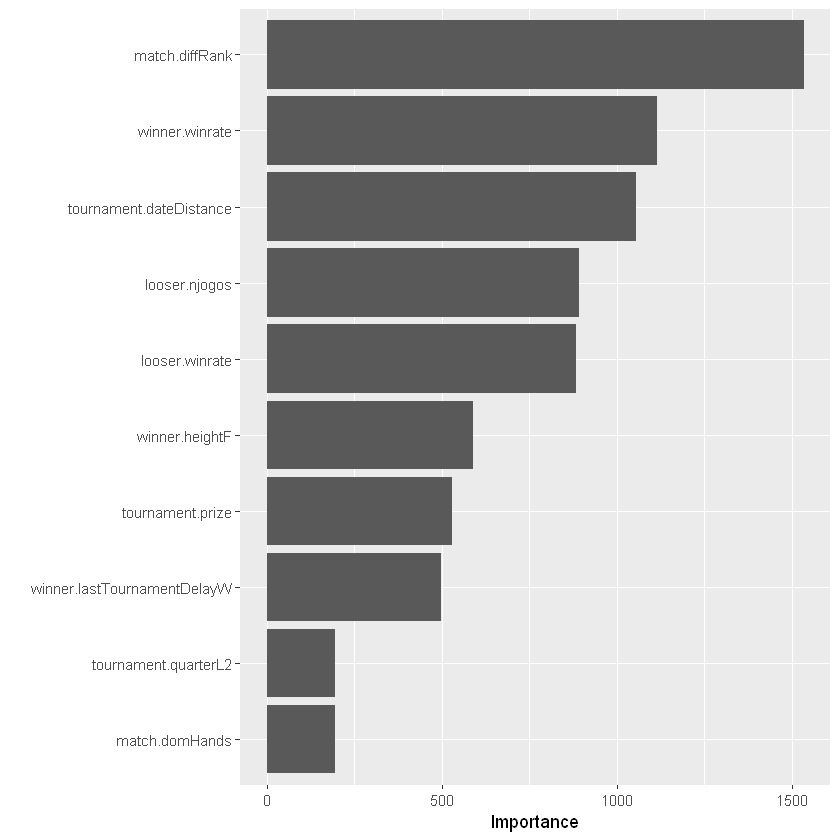

In [ ]:
fitted.imp %>% vip::vip()

In [ ]:
rf.noTieB %>% set_engine("ranger",  importance = "permutation") %>% fit(form.noTieB$formula, data=df) -> fitted.perm
fitted.perm %>% vip::vi()

Variable,Importance
<chr>,<dbl>
match.diffRank,0.230350343
winner.winrate,0.196169274
looser.winrate,0.188001658
looser.njogos,0.159833628
tournament.dateDistance,0.153403471
tournament.prize,0.111777908
winner.heightF,0.090763852
winner.lastTournamentDelayW,0.068215704
winner.bornAt,0.042404580


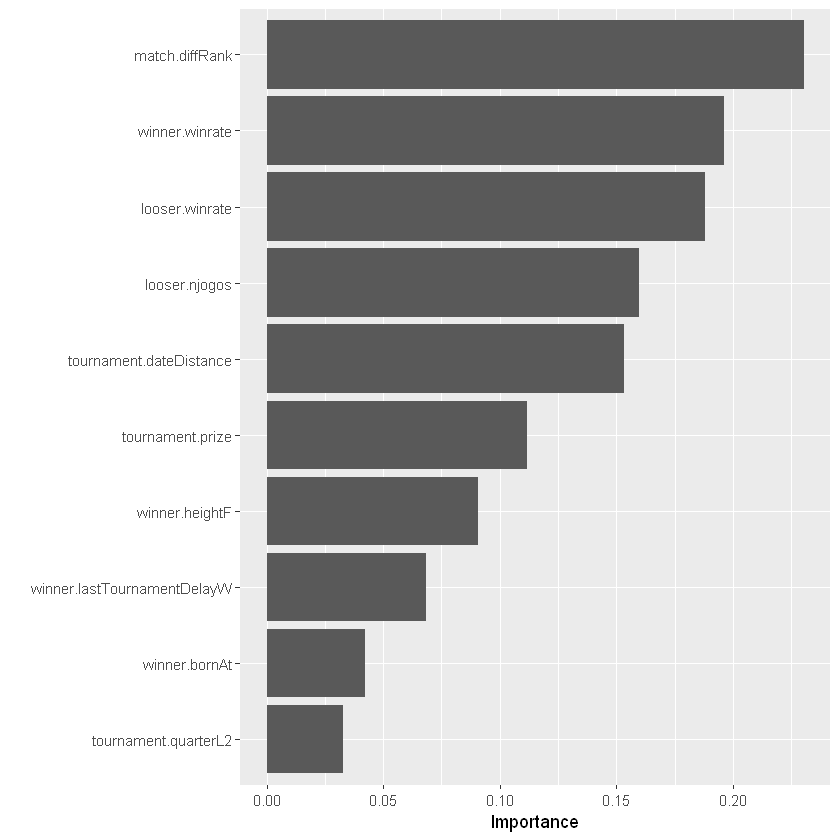

In [ ]:
fitted.perm %>% vip::vip()